In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"F:\DS\EXIT TEST\customer_churn.csv")

In [3]:
data.head ()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail ()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0.0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [9]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        7
Partner              0
Dependents           0
tenure              13
PhoneService        13
MultipleLines       13
InternetService     37
OnlineSecurity      15
OnlineBackup        15
DeviceProtection    15
TechSupport         15
StreamingTV         22
StreamingMovies     14
Contract            25
PaperlessBilling    14
PaymentMethod        1
MonthlyCharges      16
TotalCharges         7
Churn                0
dtype: int64

# HANDLING MISSING VALUES

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
Imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [12]:
sel_cols = data[['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

In [13]:
Imputer = Imputer.fit(sel_cols)

In [14]:
sel_cols = Imputer.transform(sel_cols)

In [15]:
type(sel_cols)

numpy.ndarray

In [16]:
sel_cols = pd.DataFrame(sel_cols, columns = ['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'])

In [17]:
type(sel_cols)

pandas.core.frame.DataFrame

In [18]:
sel_cols.isna().sum()

SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [19]:
data = data.drop(['SeniorCitizen', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'], axis = 1)

In [20]:
data = pd.concat([data,sel_cols], axis=1)

In [21]:
data.isna().sum()

customerID          0
gender              0
Partner             0
Dependents          0
Churn               0
SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

# OUTLIER DETECTION

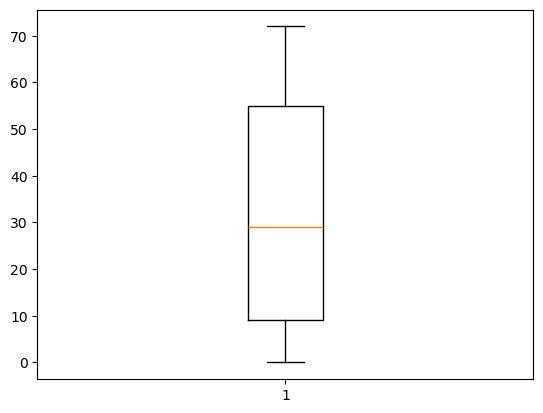

In [22]:
plt.boxplot(data['tenure'])
plt.show()

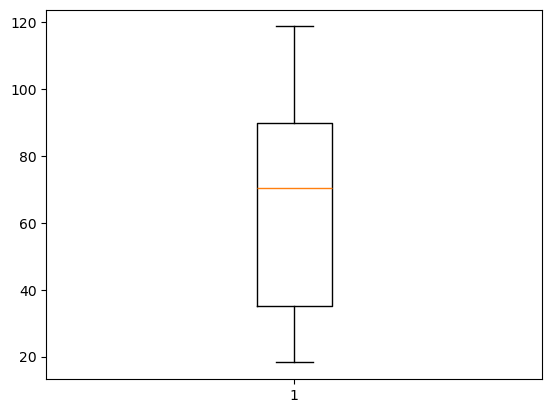

In [23]:
plt.boxplot(data['MonthlyCharges'])
plt.show()

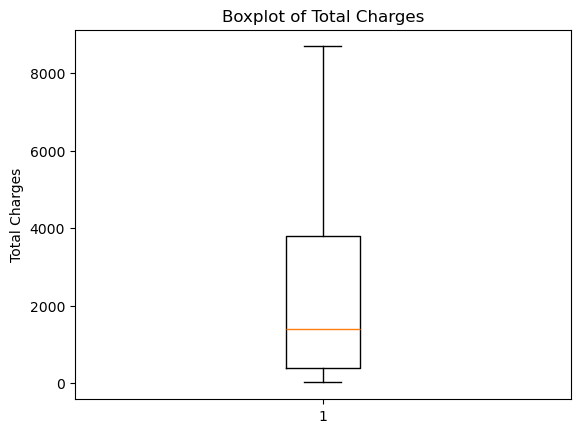

In [24]:
total_charges = pd.to_numeric(data['TotalCharges'], errors='coerce').dropna()
plt.boxplot(total_charges)
plt.title('Boxplot of Total Charges')
plt.ylabel('Total Charges')
plt.show()

# ENCODING

In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [26]:
data['Churn']=label_encoder.fit_transform(data['Churn'])

In [27]:
data.head()

,customerID,gender,Partner,Dependents,Churn,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,Yes,No,0,0.0,1.0,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,No,No,0,0.0,34.0,Yes,No,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,No,No,1,0.0,2.0,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,No,No,0,0.0,45.0,No,No phone service,DSL,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75
4,9237-HQITU,Female,No,No,1,0.0,2.0,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65


In [28]:
data['Partner']=label_encoder.fit_transform(data['Partner'])
data['Dependents']=label_encoder.fit_transform(data['Dependents'])
data['PhoneService']=label_encoder.fit_transform(data['PhoneService'])
data['InternetService']=label_encoder.fit_transform(data['InternetService'])
data['OnlineBackup']=label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection']=label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport']=label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV']=label_encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies']=label_encoder.fit_transform(data['StreamingMovies'])
data['PaperlessBilling']=label_encoder.fit_transform(data['PaperlessBilling'])

In [29]:
data = pd.get_dummies(data,columns=['gender','MultipleLines', 'OnlineSecurity', 'Contract', 
       'PaymentMethod'])

# SCALING

In [30]:
x = data.drop('Churn', axis = 1)

In [31]:
y = data ['Churn']

In [32]:
x

,customerID,Partner,Dependents,SeniorCitizen,tenure,PhoneService,InternetService,OnlineBackup,DeviceProtection,TechSupport,...,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,0.0,1.0,0,0,2,0,0,...,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,0,0,0.0,34.0,1,0,0,2,0,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,0,0,0.0,2.0,1,0,2,0,0,...,False,False,True,True,False,False,False,False,False,True
3,7795-CFOCW,0,0,0.0,45.0,0,0,0,2,2,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,0,0,0.0,2.0,1,1,0,0,0,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,0.0,24.0,1,0,0,2,2,...,False,False,True,False,True,False,False,False,False,True
7039,2234-XADUH,1,1,0.0,72.0,1,1,2,2,0,...,True,False,False,False,True,False,False,True,False,False
7040,4801-JZAZL,1,1,0.0,11.0,0,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
7041,8361-LTMKD,1,0,1.0,4.0,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True


In [33]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [34]:
x.shape

(7043, 30)

In [35]:
x.customerID.nunique()

7043

In [36]:
x1 = x.drop('customerID', axis =1)

In [37]:
x1.head()

,Partner,Dependents,SeniorCitizen,tenure,PhoneService,InternetService,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0.0,1.0,0,0,2,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0.0,34.0,1,0,0,2,0,0,...,False,False,True,False,True,False,False,False,False,True
2,0,0,0.0,2.0,1,0,2,0,0,0,...,False,False,True,True,False,False,False,False,False,True
3,0,0,0.0,45.0,0,0,0,2,2,0,...,False,False,True,False,True,False,True,False,False,False
4,0,0,0.0,2.0,1,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
